## Import LIberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

### Read Dataset

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Info about Data
The dataset appears to be related to the Titanic passengers, with columns providing details about each passenger. Here’s a breakdown of what each column represents:


**PassengerId** – A unique identifier for each passenger in the dataset.

**Survived** – Indicates whether the passenger survived (1) or not (0).

**Pclass** (Passenger Class) – The class in which the passenger traveled:

1 = First Class

2 = Second Class

3 = Third Class

**Name** – The full name of the passenger.

**Sex** – The gender of the passenger (male or female).

**Age** – The age of the passenger in years.

**SibSp** (Sibling/Spouse Count) – The number of siblings or spouses the passenger had aboard the Titanic.

**Parch** (Parent/Children Count) – The number of parents or children the passenger had aboard the Titanic.

**Ticket** – The ticket number assigned to the passenger.

**Fare** – The amount paid for the ticket (in British pounds).

**Cabin** – The cabin number assigned to the passenger (if available).

**Embarked** – The port from which the passenger boarded the Titanic:

C = Cherbourg

Q = Queenstown

S = Southampton

### Data Cleaning and Preprocessing

In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Handeling Missing Value

In [4]:
## Groups the data by Pclass and Sex, calculates the median age for each group, and fills missing Age values with the corresponding group median.
#1- Preserves the natural distribution of ages.
#2- More accurate since age varies by class and gender.
#3- Avoids bias from using a single average for all passengers.
df['Age'] = df['Age'].fillna(df.groupby(['Pclass', 'Sex'])['Age'].transform('median'))


In [5]:
#Drop Cabin column
# If the number of missing values ​​is bigger than 50%  deleting the column may be the best option. 
df.drop(columns=['Cabin'], inplace=True)


In [6]:
# Possible solutions:
#1- Substitute values ​​with the most common value (Mode Imputation) – best option
#2- Use Pclass or Fare to guess
#If you want higher accuracy, look for similar passengers (e.g. from the same Pclass and Fare) to determine Embarked.

df['Embarked'] = df.groupby('Pclass')['Embarked'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'S'))



In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [8]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Drop Unnecesary Columns 

In [9]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)


In [10]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,21.5,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [11]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### Analysis & Visualization

In [12]:
import matplotlib.pyplot as plt


<Axes: ylabel='count'>

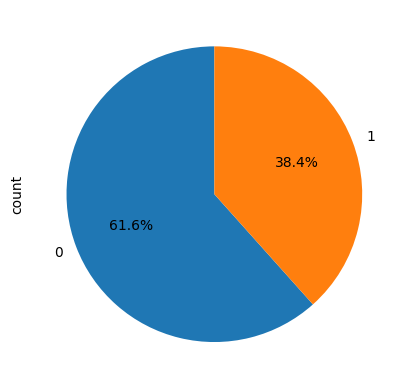

In [13]:
df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)


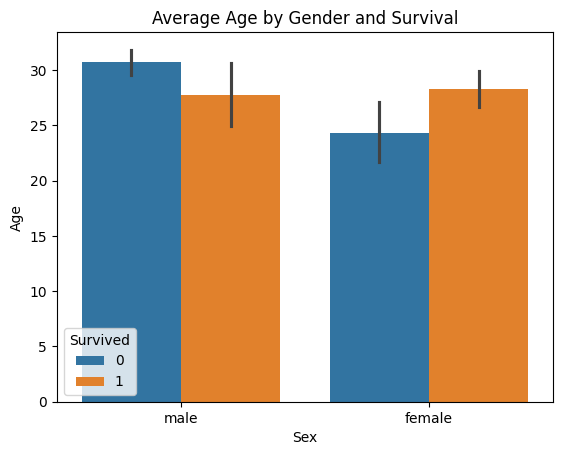

In [14]:

sns.barplot(x='Sex', y='Age', hue='Survived', data=df)
plt.title('Average Age by Gender and Survival')
plt.show()


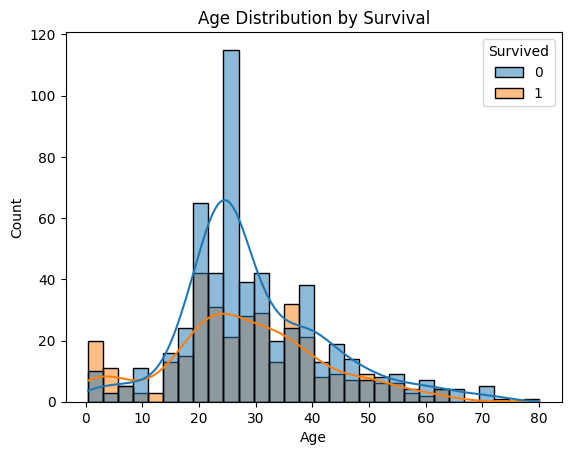

In [15]:
sns.histplot(df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.show()


In [16]:
print(df.groupby('Embarked')['Survived'].mean())


Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


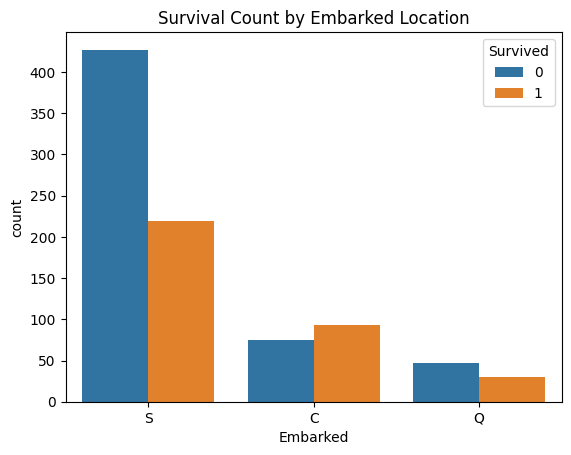

In [17]:


sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarked Location')
plt.show()


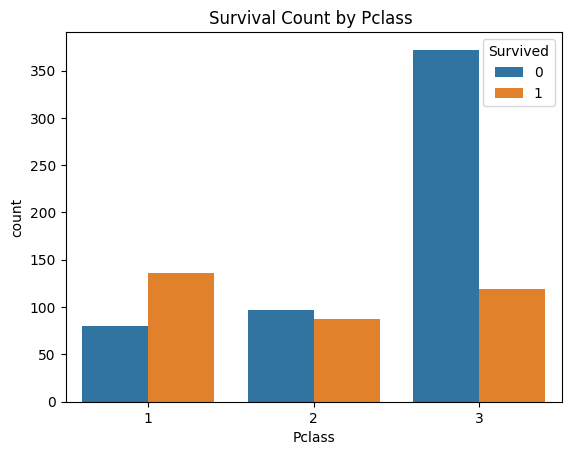

In [18]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Pclass ')
plt.show()

Pclass  Embarked
1       C           0.694118
        Q           0.500000
        S           0.589147
2       C           0.529412
        Q           0.666667
        S           0.463415
3       C           0.378788
        Q           0.375000
        S           0.189802
Name: Survived, dtype: float64


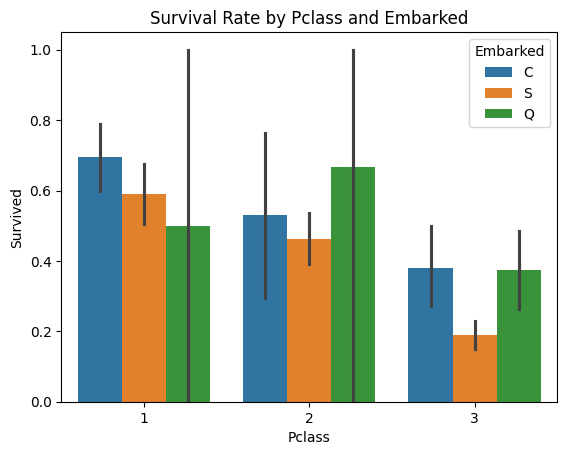

In [19]:
print(df.groupby(['Pclass', 'Embarked'])['Survived'].mean())
sns.barplot(x='Pclass', y='Survived', hue='Embarked', data=df)
plt.title('Survival Rate by Pclass and Embarked')
plt.show()

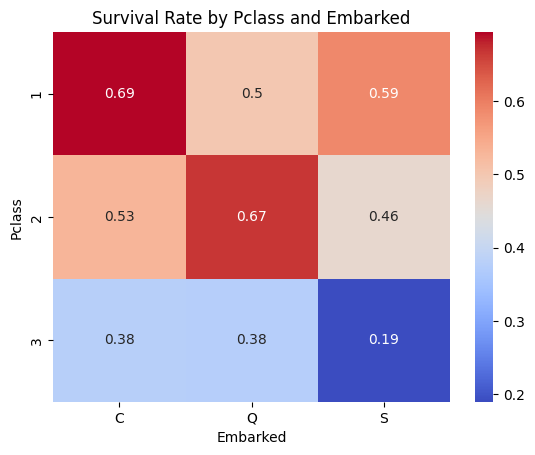

In [20]:
survival_rate = df.pivot_table(index='Pclass', columns='Embarked', values='Survived', aggfunc='mean')
sns.heatmap(survival_rate, annot=True, cmap="coolwarm")
plt.title('Survival Rate by Pclass and Embarked')
plt.show()


### Pairplot
Using a pairplot to visualize the relationships between numerical features in the dataset, with the points colored by the 'Survived' column to differentiate between survivors and non-survivors.


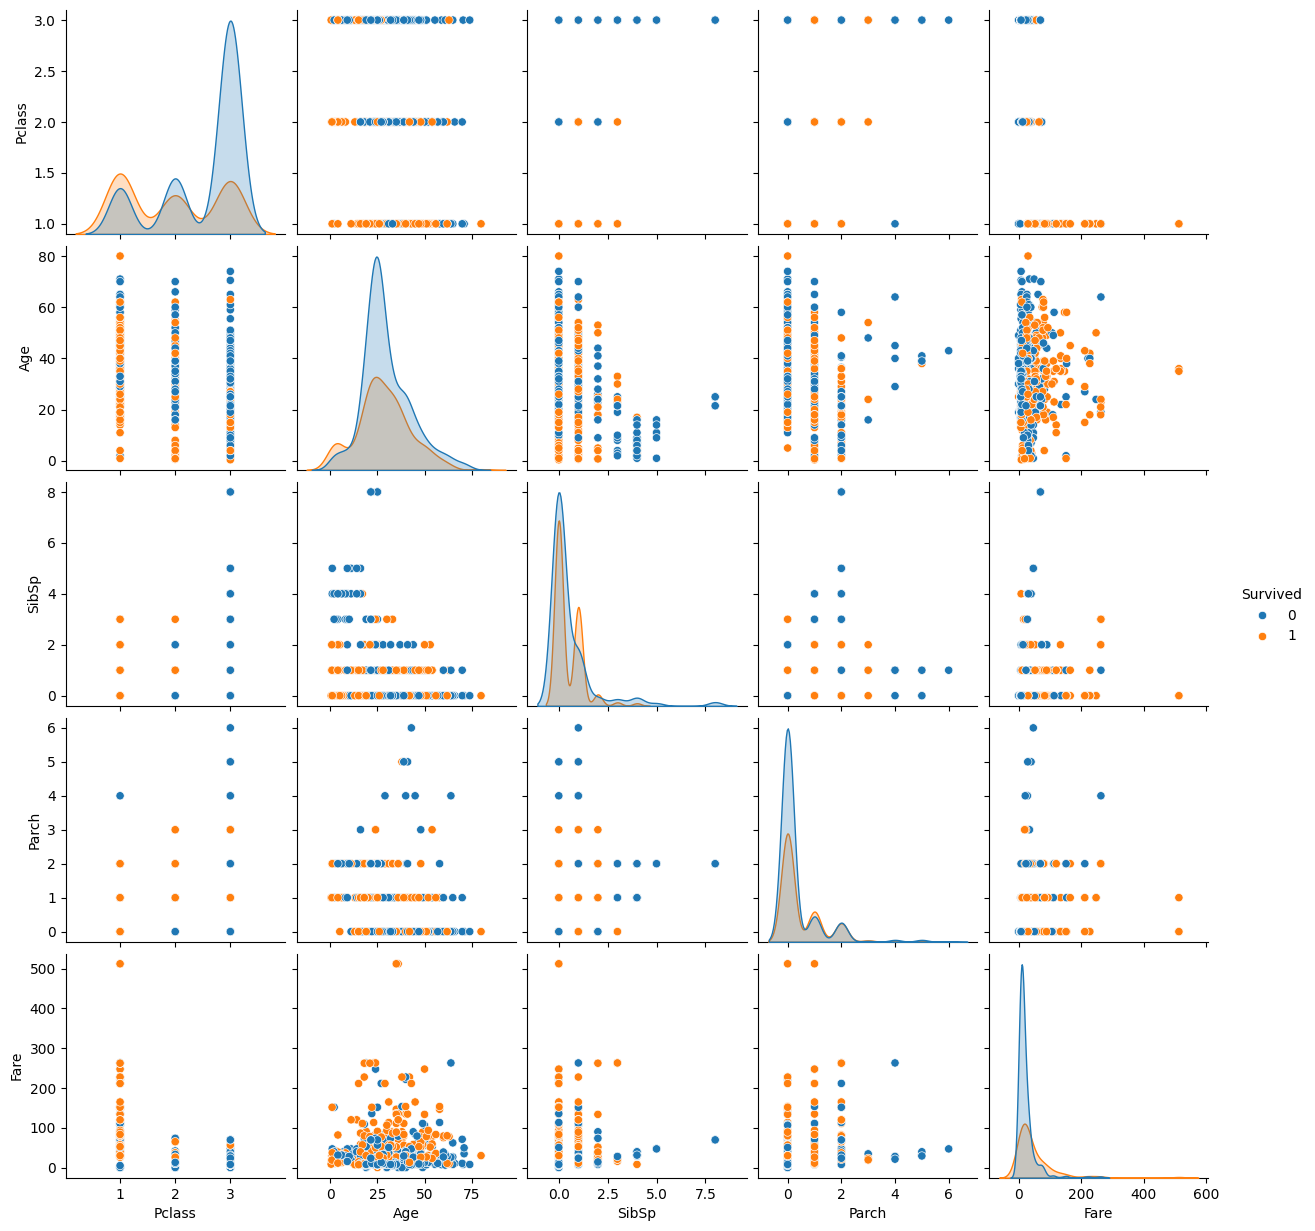

In [21]:
sns.pairplot(df,hue="Survived")
plt.show()

### HeatMap
Using a heatmap to visualize the correlation matrix of numerical features in the dataset, with annotations displaying the correlation values


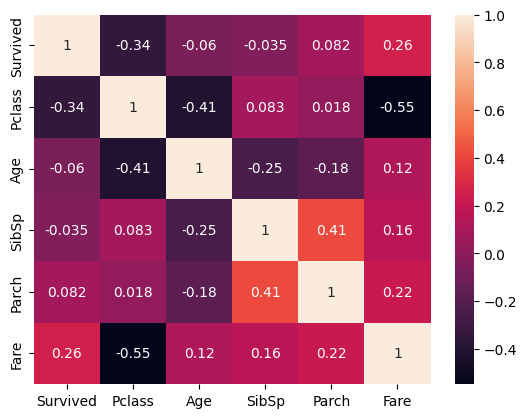

In [22]:

dataplot = sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

## Build ML Model


#### Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder


In [24]:
# Use Label Encoding (if each column has only two values)
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male → 1, female → 0


In [25]:
le = LabelEncoder()
df['Embarked'] = le.fit_transform(df['Embarked'])  # (0, 1, 2) for each class (S, C, Q)

In [26]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,21.5,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


### Split Data to Train and Test

In [27]:
X = df.drop(columns=['Survived']) 
y = df['Survived'] 

In [28]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,21.5,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [29]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


In [32]:
model = LogisticRegression(max_iter=1500)


In [33]:
model.fit(X_train,y_train)


LogisticRegression(max_iter=1500)

In [34]:
model.score(X_train,y_train)


0.8061797752808989

#### use cross_val_score function

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [36]:
scores2 =  cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X,y,cv=50)
scores2

array([0.88888889, 0.55555556, 0.83333333, 0.94444444, 0.72222222,
       0.83333333, 0.61111111, 0.94444444, 0.66666667, 0.88888889,
       0.83333333, 0.72222222, 0.88888889, 0.77777778, 0.66666667,
       0.77777778, 1.        , 0.77777778, 0.83333333, 0.88888889,
       0.72222222, 0.83333333, 0.72222222, 0.72222222, 0.94444444,
       0.77777778, 0.83333333, 0.83333333, 0.61111111, 0.88888889,
       0.72222222, 0.66666667, 0.83333333, 0.83333333, 0.83333333,
       0.66666667, 0.72222222, 0.83333333, 0.83333333, 0.77777778,
       0.88888889, 0.82352941, 0.82352941, 0.88235294, 0.82352941,
       0.70588235, 0.82352941, 0.82352941, 0.88235294, 0.82352941])

In [37]:
np.average(scores2)

np.float64(0.7993464052287581)

In [38]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=200),X,y,cv=70)    
scores2

array([0.92307692, 0.76923077, 0.46153846, 0.61538462, 0.76923077,
       0.92307692, 0.76923077, 0.76923077, 0.69230769, 0.84615385,
       0.76923077, 0.84615385, 0.69230769, 0.84615385, 0.76923077,
       0.76923077, 0.76923077, 0.84615385, 0.84615385, 0.76923077,
       0.69230769, 0.69230769, 0.92307692, 0.84615385, 0.92307692,
       0.76923077, 0.76923077, 0.92307692, 0.84615385, 1.        ,
       0.84615385, 0.92307692, 0.84615385, 0.76923077, 0.84615385,
       0.92307692, 0.84615385, 0.84615385, 0.61538462, 0.84615385,
       0.84615385, 0.84615385, 0.84615385, 0.61538462, 0.61538462,
       0.92307692, 0.84615385, 0.92307692, 0.84615385, 0.69230769,
       0.84615385, 0.83333333, 0.83333333, 0.66666667, 0.66666667,
       0.91666667, 0.83333333, 0.91666667, 0.75      , 0.75      ,
       0.91666667, 0.91666667, 0.91666667, 0.66666667, 0.83333333,
       0.83333333, 0.75      , 0.91666667, 1.        , 1.        ])

In [39]:
np.average(scores2)

np.float64(0.8130952380952382)

### XGBoost (XGBClassifier)

In [40]:
from xgboost import XGBClassifier


In [49]:
xgb = XGBClassifier(n_estimators= 500 , max_depth= 100 , learning_rate = 0.005 )


In [50]:
xgb.fit(X_train , y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.005, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=100, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [51]:
xgb.score(X_train , y_train)


0.9115168539325843

In [52]:
xgb.score(X_test , y_test)


0.8435754189944135

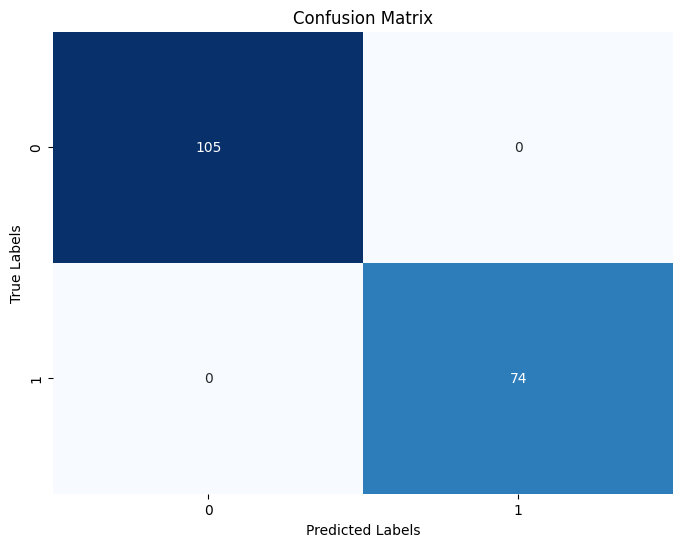

In [45]:
xgb= confusion_matrix(y_test, y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(xgb, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Save & Load Model

In [46]:
import joblib


In [47]:
joblib.dump(xgb,'model_Titanic.pkl')


['model_Titanic.pkl']

In [48]:
xgb = joblib.load("model_Titanic.pkl")
